Notebook where we reproduce our main similarity analysis using PPI for defining connectivity

In [3]:
from scipy.spatial.distance import squareform
from nilearn.image import load_img
from statsmodels.stats.multitest import multipletests
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import os
from scipy.stats import ttest_1samp
from scipy.stats import spearmanr
from scipy.spatial.distance import dice

final_subjects = np.loadtxt("../data/subjects_intersect_motion_035.txt")
final_subjects

array([2049., 2050., 1026., 1028., 2055., 2058., 2059., 2060., 2062.,
       2063., 2065., 2069., 2070., 2077., 2081., 2086., 2087., 2088.,
       2089., 2043., 2102., 2104., 2105., 2106., 3132., 2109., 3135.,
       3136., 3137., 2113., 2115., 2116., 2117., 3142., 2119., 3144.,
       2120., 2122., 2123., 3148., 3149., 2126., 3146., 2127., 2129.,
       2130., 2131., 2128., 3156., 3158., 3161., 3162., 3165., 3167.,
       3168., 3172., 3176., 3177., 3178., 3179., 3183., 3188., 3189.,
       3191., 3192., 3193., 3196., 3198., 3199., 3200., 3205., 3208.,
       3209., 3214., 3219., 3224., 3225., 3227., 3228., 3233., 3234.,
       3236., 3238., 3239., 3240., 4265., 4268., 3245., 4269., 3247.,
       3248., 3249., 4274., 3250., 3252., 3246., 3254., 4279., 5304.,
       5305., 4281., 3259., 3260., 4285., 5310., 3263., 5312., 5313.,
       5314., 3261., 5317., 4294., 4297., 4298., 5325., 5326., 5334.,
       5336., 5337., 5339., 5340., 5343., 5346., 5347., 5351., 5352.,
       5356., 5366.,

In [27]:
from nilearn.image import load_img
from matplotlib.colors import ListedColormap

# Atlas
atlas_img = load_img("../data/atlases/shen_2mm_268_parcellation.nii.gz")
shen_rsns = pd.read_csv("../data/atlases/shen_268_parcellation_networklabels.csv")
shen_rsns.head()

rsn_lables = ['medial-frontal', 'frontoparietal', 'default-mode','subcortical-cerebellum',
              'motor', 'visual-1', 'visual-2', 'visual-association']
print(rsn_lables)
# Add colours to each network (R, G, B)
rsn_colors = [[128,0,128], [0,255,255], [255,215,0], [255,69,0],
              [0,0,128], [255,0,255], [0,255,0], [128,0,0]
             ]
print(rsn_colors)

rsn_norm_colors = [(rgb[0]/255, rgb[1]/255, rgb[2]/255) for rgb in rsn_colors]
rsn_cmap = ListedColormap(rsn_norm_colors)
print(rsn_cmap)

netassignments = shen_rsns.Network.to_numpy()
print(netassignments)

# Increasing order to rearrange matrices
indsort = shen_rsns.sort_values("Network").index.to_numpy()
print(indsort)

def stat_mat_figure(stat_mat, ax):
    
    import matplotlib as mpl
    from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
    from nilearn.plotting import cm as ni_cm
    from nilearn.plotting.cm import _cmap_d as nilearn_cmaps

    n = stat_mat.shape[0]

    stat_mat_sorted = stat_mat[indsort,:][:, indsort.T]
    
    #vmin = np.min(squareform(stat_mat_sorted, checks=False))
    #vmax = np.max(squareform(stat_mat_sorted, checks=False))
    vmin=-10
    vmax=10
    norm = mpl.colors.TwoSlopeNorm(vmin = vmin,  vcenter=0, vmax = vmax)
    
    divider = make_axes_locatable(ax)
    yhax = divider.append_axes("right", size=0.5, pad = 0.01)
    xhax = divider.append_axes("top", size=0.5, pad = 0)

    im = ax.imshow(stat_mat_sorted, aspect='equal', cmap=nilearn_cmaps['cyan_orange'], norm=norm)

    yhax.imshow(netassignments[indsort].astype(int).reshape(-1, 1), aspect=0.056,
                cmap=rsn_cmap)
    yhax.set_xticks([])
    yhax.set_yticks([])
    xhax.imshow(netassignments[indsort].astype(int).reshape(1, -1), aspect=1/0.054,
                cmap=rsn_cmap)
    xhax.set_xticks([])
    xhax.set_yticks([])

    unique_rsn, vcount = np.unique(netassignments, return_counts=True)

    y_o = 0
    
    ax.set_xticks(np.round(np.linspace(0, 268, 5), decimals=0).astype(int))
    ax.set_yticks(np.round(np.linspace(0, 268, 5), decimals=0).astype(int))
    ax.set_xticklabels(["1", "68", "134", "201", "268"])
    ax.set_yticklabels(["1", "68", "134", "201", "268"])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("Regions", fontsize = 35)
    ax.tick_params(axis="both", labelsize=25)
    yhax.set_axis_off()
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', fraction=.04, pad=0.15)
    cbar.ax.set_xlabel('t-stat', fontsize=25, fontweight='bold', labelpad=10)
    
    np.arange(vmin, vmax)
    cbar.set_ticks([-10, -5, 0, 5, 10])
    cbar.ax.tick_params(labelsize=20)
    return ax


['medial-frontal', 'frontoparietal', 'default-mode', 'subcortical-cerebellum', 'motor', 'visual-1', 'visual-2', 'visual-association']
[[128, 0, 128], [0, 255, 255], [255, 215, 0], [255, 69, 0], [0, 0, 128], [255, 0, 255], [0, 255, 0], [128, 0, 0]]
[2 4 3 2 3 3 2 2 2 1 4 1 3 2 4 1 2 4 2 4 2 2 5 5 5 5 5 4 4 2 2 4 5 5 5 4 5
 5 5 5 8 6 8 4 5 5 2 2 3 3 5 1 1 1 2 1 1 5 8 5 5 5 5 1 1 8 8 6 8 2 8 6 8 8
 6 7 6 7 6 6 7 6 4 5 3 3 6 4 5 3 4 5 4 4 4 3 5 6 4 7 4 7 4 4 4 4 4 4 5 4 2
 2 4 4 3 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 1 3 2 1 3 2 2 4 1 4 2 1
 1 1 1 4 1 2 4 1 2 5 5 5 5 1 5 2 1 5 5 5 4 5 5 5 5 5 8 6 8 4 5 5 5 2 1 2 1
 1 1 5 5 1 5 1 2 1 5 2 5 6 2 8 8 5 3 8 6 8 6 6 8 8 6 7 7 7 6 6 4 5 1 4 4 3
 3 4 3 4 3 5 4 4 4 4 4 4 5 4 4 4 3 8 7 2 4 4 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4]
[164  52  51 147 193 148 191 161 189 185 184 149 182 150 152 186 218  53
 155  56  15 144  11 139   9  55  63  64 136 153 110 111  69 115  54 138
 141 146 142  46  47   0 163 246 245   3 241   6   7   8 156 

In [23]:
def symmetrize_ppi(ppi_mat):
    """Function to symmetrize PPI matrices, according to Cole 2013"""
    
    from scipy.spatial.distance import squareform
    
    upper_part = squareform(ppi_mat, checks=False)
    lower_part = squareform(ppi_mat.T, checks=False)
    
    return 0.5*(upper_part + lower_part)

def compute_group_ppi(task_id):
    base_dir = "../results/supplementary/ppi/shen/first-level/task-%s" % task_id + "/sub-%d"
    
    res_ppi_dict = dict()

    pattern = base_dir +  "/incongruent_vs_congruent_ppi.npy"
    ppi_values = np.array([np.load(pattern % subj) for subj in final_subjects])
    ppi_values = np.array([symmetrize_ppi(ppi_values[ii,:,:]) for ii in range(len(final_subjects))])
    t_group, p_values = np.apply_along_axis(func1d=ttest_1samp, axis=0, arr=ppi_values, popmean=0)
    
    res_ppi_dict['stat'] = t_group
    res_ppi_dict['p_values'] = p_values
    res_ppi_dict['p_values_bonf'] = multipletests(p_values, method="bonferroni")[1]
    res_ppi_dict['stat_bonf'] = t_group*(res_ppi_dict['p_values_bonf']<0.05)
    return res_ppi_dict

def load_group_edge(task_id):
    base_dir = "../results/second-level/edge_gsr/shen/task-%s" % task_id
    res_edge_dict = dict()

    t_group = squareform(np.squeeze(load_img(base_dir + "/Incongruent-Congruent/stat.nii.gz").get_fdata()),
                         checks=False)
    res_edge_dict['stat'] = t_group

    z_stat = squareform(np.squeeze(load_img(base_dir + "/Incongruent-Congruent/z_score.nii.gz").get_fdata()),
                        checks=False)
    p_values = stats.norm.sf(abs(z_stat))*2
    
    res_edge_dict['p_values'] = p_values
    res_edge_dict['p_values_bonf'] = multipletests(p_values, method="holm")[1]
    res_edge_dict['stat_bonf'] = t_group*(res_edge_dict['p_values_bonf']<0.05)
    
    return res_edge_dict

In [9]:
ppi_stroop = compute_group_ppi(task_id="stroop")
ppi_msit = compute_group_ppi(task_id="msit")

edge_stroop = load_group_edge(task_id="stroop")
edge_msit= load_group_edge(task_id="msit")

In [7]:
#  Between-methods similarity
print(spearmanr(ppi_stroop['stat'], edge_stroop['stat']))
print(spearmanr(ppi_msit['stat'], edge_msit['stat']))

SpearmanrResult(correlation=0.7433589370679115, pvalue=0.0)
SpearmanrResult(correlation=0.7718137673326315, pvalue=0.0)


In [10]:
# between-task similarity
print(spearmanr(ppi_msit['stat'], ppi_stroop['stat']))
print(1-dice(ppi_msit['p_values_bonf']<0.05, ppi_stroop['p_values_bonf']<0.05))

SpearmanrResult(correlation=0.5347352144021457, pvalue=0.0)
0.3499546690843155


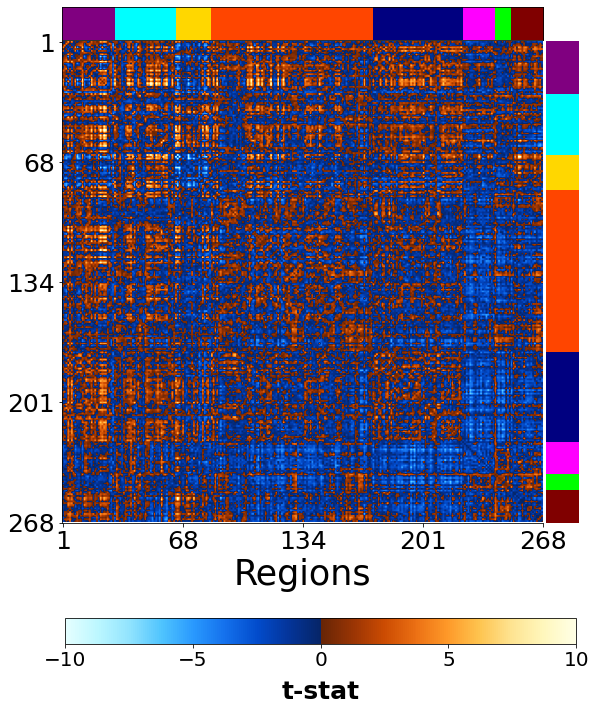

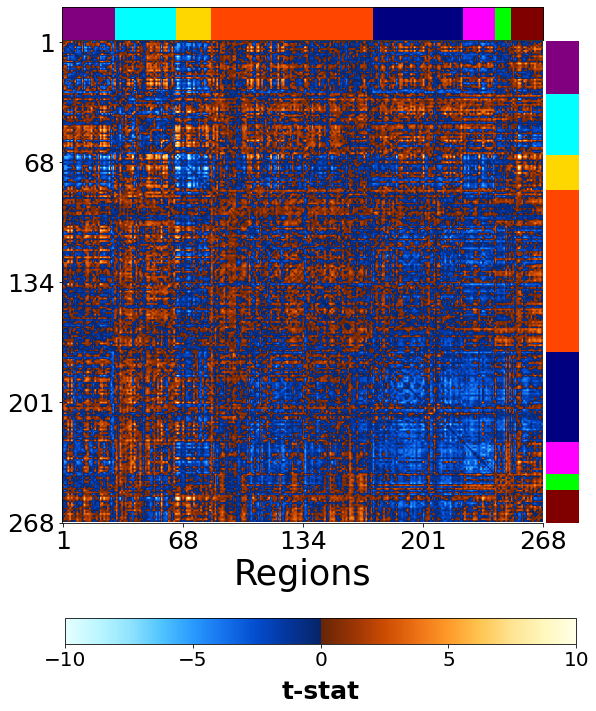

In [29]:
Path("../plots/supplementary").mkdir(exist_ok=True)

fig, ax = plt.subplots(figsize=(10,10))
stat_mat_figure(squareform(ppi_stroop['stat']), ax=ax)
plt.tight_layout()
plt.savefig("../plots/supplementary/ppi_inc_con_mat_stroop.svg", dpi=300)
plt.savefig("../plots/supplementary/ppi_inc_con_mat_stroop.png", dpi=300)

fig, ax = plt.subplots(figsize=(10,10))
stat_mat_figure(squareform(ppi_msit['stat']), ax=ax)
plt.tight_layout()
plt.savefig("../plots/supplementary/ppi_inc_con_mat_msit.svg", dpi=300)
plt.savefig("../plots/supplementary/ppi_inc_con_mat_msit.png", dpi=300)

#fig, ax = plt.subplots(figsize=(10,10))
#stat_mat_figure(squareform(edge_stroop['stat']), ax=ax)
#plt.tight_layout()
#plt.savefig("../plots/supplementary/edge_inc_con_mat_stroop.svg", dpi=300)
#plt.savefig("../plots/supplementary/edge_inc_con_mat_stroop.png", dpi=300)

#fig, ax = plt.subplots(figsize=(10,10))
#stat_mat_figure(squareform(edge_msit['stat']), ax=ax)
#plt.tight_layout()
#plt.savefig("../plots/supplementary/edge_inc_con_mat_msit.svg", dpi=300)
#plt.savefig("../plots/supplementary/edge_inc_con_mat_msit.png", dpi=300)

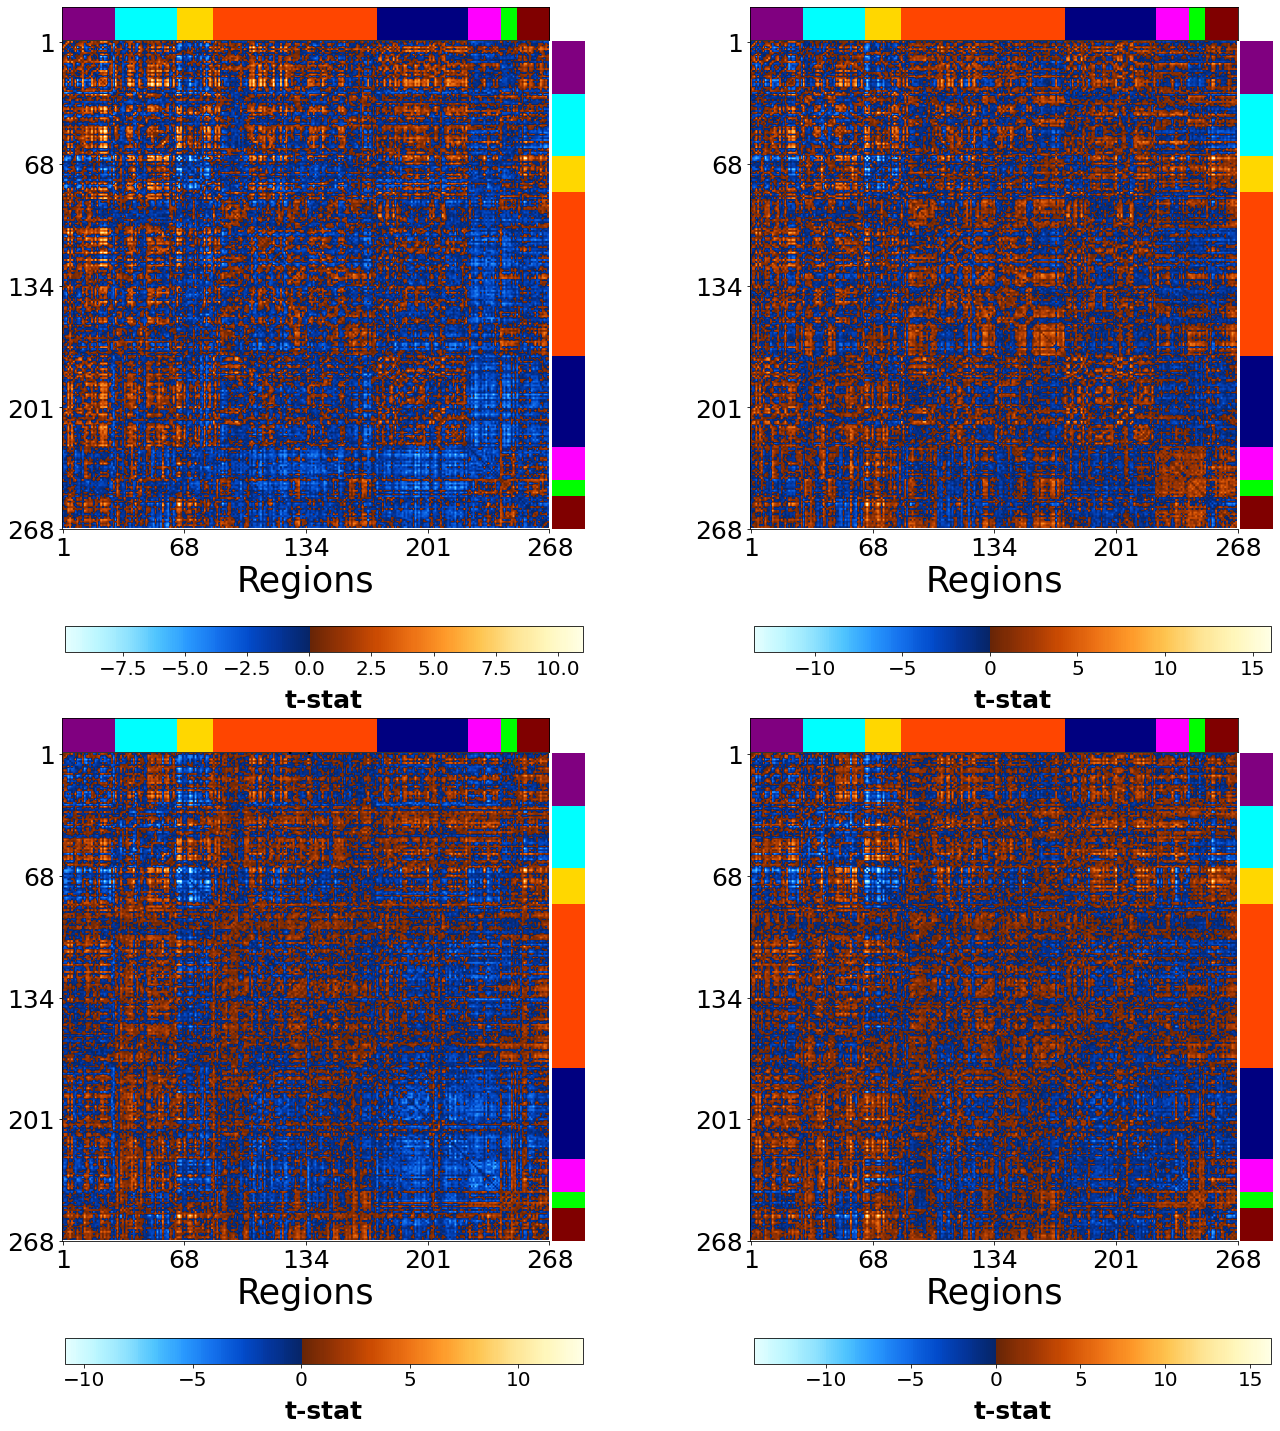

In [23]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
stat_mat_figure(squareform(ppi_stroop['stat']), ax=axs[0,0])
stat_mat_figure(squareform(ppi_msit['stat']), ax=axs[1,0])

stat_mat_figure(squareform(edge_stroop['stat']), ax=axs[0,1])
stat_mat_figure(squareform(edge_msit['stat']), ax=axs[1,1])

axs[0,0].set_title("PPI", size=30)
axs[1,0].set_title("Our approach", size=30)

plt.tight_layout()

In [25]:
# Spearman Similarity between tasks 
print(spearmanr(ppi_stroop['stat'], ppi_msit['stat']))

# Overlapping analysis between tasks using Dice similarity coefficient
print(1-dice(ppi_stroop['p_values_bonf']<0.05, ppi_msit['p_values_bonf']<0.05))

SpearmanrResult(correlation=0.5347352144021457, pvalue=0.0)
0.3499546690843155
